In [16]:
try:
  from sklearnex import patch_sklearn # speed up sklearn if cpu is intel
  patch_sklearn()
except ImportError as sklearnex_not_installed:
  print("sklearnex not installed, use default sklearn instead")
  print("if you want to use sklearn, please refer to https://pypi.org/project/scikit-learn-intelex/")
  

from TrainingData import load_KTH
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, preprocessing
from sklearn.pipeline import make_pipeline
import pandas as pd

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [17]:
training_data = load_KTH()
training_data = training_data.apply(lambda row: row[training_data['label'].isin(['walking','running'])])

In [18]:
# training_data = load_KTH()
# training_data["label"] = training_data["label"].apply(lambda x: "walking" if x=="jogging" else x)
# training_data.groupby("label").count()


<img src="images/Pose Landmark Model.png"><img>

from https://github.com/google/mediapipe/blob/master/docs/solutions/pose.md

In [19]:
unneeded_data = ["filename", "label",'NOSE_x', 'NOSE_y', 'LEFT_EYE_INNER_x', 'LEFT_EYE_INNER_y',
       'LEFT_EYE_x', 'LEFT_EYE_y', 'LEFT_EYE_OUTER_x', 'LEFT_EYE_OUTER_y',
       'RIGHT_EYE_INNER_x', 'RIGHT_EYE_INNER_y', 'RIGHT_EYE_x', 'RIGHT_EYE_y',
       'RIGHT_EYE_OUTER_x', 'RIGHT_EYE_OUTER_y', 'LEFT_EAR_x', 'LEFT_EAR_y',
       'RIGHT_EAR_x', 'RIGHT_EAR_y', 'MOUTH_LEFT_x', 'MOUTH_LEFT_y',
       'MOUTH_RIGHT_x', 'MOUTH_RIGHT_y','LEFT_PINKY_x', 'LEFT_PINKY_y',
       'RIGHT_PINKY_x', 'RIGHT_PINKY_y', 'LEFT_INDEX_x', 'LEFT_INDEX_y',
       'RIGHT_INDEX_x', 'RIGHT_INDEX_y', 'LEFT_THUMB_x', 'LEFT_THUMB_y',
       'RIGHT_THUMB_x', 'RIGHT_THUMB_y','LEFT_HEEL_x', 'LEFT_HEEL_y',
       'RIGHT_HEEL_x', 'RIGHT_HEEL_y', 'LEFT_FOOT_INDEX_x',
       'LEFT_FOOT_INDEX_y', 'RIGHT_FOOT_INDEX_x', 'RIGHT_FOOT_INDEX_y',]

In [20]:
le = preprocessing.LabelEncoder()
training_data["Encoded_label"] = le.fit_transform(training_data["label"])
training_data.drop(unneeded_data, axis=1, inplace=True)
training_data.head()

,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,...,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y,Encoded_label
16822,0.949235,0.855545,0.838653,0.848690,1.000000,0.653444,0.834492,0.662607,0.948844,0.482841,...,0.509713,0.420640,0.276058,0.703022,0.276338,0.337730,0.031708,0.767527,0.085185,1
16823,0.769955,0.856092,0.713916,0.850601,0.824413,0.654259,0.723230,0.662253,0.741773,0.486688,...,0.510192,0.546699,0.268776,0.438280,0.276862,0.931471,0.167156,0.331816,0.047386,1
16824,0.662724,0.854278,0.529062,0.849064,0.691000,0.653138,0.484367,0.659301,0.507391,0.483480,...,0.508975,0.227023,0.265978,0.326165,0.272680,0.388823,0.073849,0.980171,0.089500,1
16825,0.604562,0.856166,0.502824,0.850241,0.522665,0.646558,0.452364,0.659111,0.420772,0.486152,...,0.505944,0.261415,0.258612,0.336639,0.269315,0.353861,0.032283,0.871002,0.104252,1
16826,0.721278,0.860698,0.540100,0.856338,0.669188,0.661332,0.469216,0.683339,0.445735,0.498304,...,0.508358,0.266613,0.259216,0.321320,0.279776,0.427773,0.029615,0.850608,0.105435,1


In [21]:
le.classes_

array(['running', 'walking'], dtype=object)

In [22]:
le.transform(le.classes_)

array([0, 1])

In [23]:
X, y = training_data.iloc[:, :-1],  training_data["Encoded_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
print(X_train.shape)
X_train.head(1)

(28941, 24)


,LEFT_SHOULDER_x,LEFT_SHOULDER_y,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,LEFT_ELBOW_x,LEFT_ELBOW_y,RIGHT_ELBOW_x,RIGHT_ELBOW_y,LEFT_WRIST_x,LEFT_WRIST_y,...,RIGHT_HIP_x,RIGHT_HIP_y,LEFT_KNEE_x,LEFT_KNEE_y,RIGHT_KNEE_x,RIGHT_KNEE_y,LEFT_ANKLE_x,LEFT_ANKLE_y,RIGHT_ANKLE_x,RIGHT_ANKLE_y
34835,0.153789,0.835144,0.730724,0.85214,0.0,0.676602,0.930273,0.686223,0.047901,0.753047,...,0.542696,0.500606,0.429951,0.256422,0.53536,0.377569,0.744281,0.022809,0.763976,0.174986


In [25]:
y_train

34835    0
18549    1
36770    0
38519    0
31192    0
        ..
17194    1
18811    1
30393    0
26972    1
28590    0
Name: Encoded_label, Length: 28941, dtype: int32

In [26]:
clf = svm.SVC()

In [27]:
clf.fit(X_train.values, y_train.values)

SVC()

In [28]:
clf.score(X_test.values, y_test.values)

0.9385364842454395

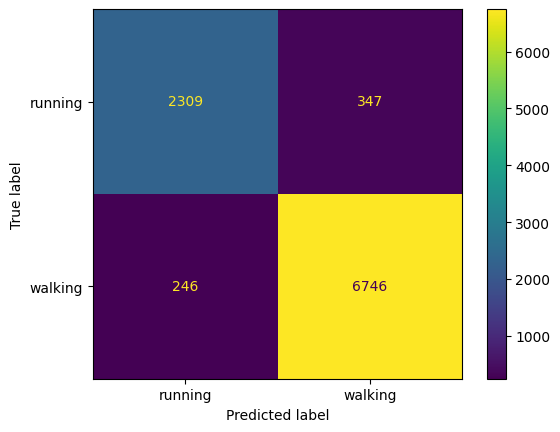

In [29]:
# code from https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test.values)
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred), labels=le.inverse_transform(clf.classes_))
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(clf.classes_))
disp.plot()
plt.show()

# Saving the trained model

In [30]:
import joblib
from pathlib import Path
joblib.dump(clf, str(Path('models')/'action'/'pose_action_classifier_no_jogging.pkl'))
joblib.dump(le, str(Path('models')/'label'/'label_encoder.pkl'))

['models\\label\\label_encoder.pkl']

# loading the saved model
```python
# Load the model from the file
pose_action_classifier = joblib.load('filename.pkl')
label_encoder = joblib.load('filename2.pkl')

# Use the loaded model to make predictions
y_pred = pose_action_classifier.predict(X_test)
action_pred = label_encoder.inverse_transform(y_pred)

```